<a href="https://colab.research.google.com/github/jiobu1/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Jisha_Obukwelu_DSPT5_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



#Import Libraries

In [0]:
import scipy.stats as stats
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**1. Iterative Bayesian Theorem**

### Bayes Theorem

$$P(User|+) = \frac{P(+|User)P(User)}{P(+|User)P(User)+P(+|Non-user)P(Non-user) )}$$

DEF prob_drunk_given_positive

In [2]:
#Given information
P_user = 1/1000
P_non_user = 1 - P_user
P_pos_given_user = 1
P_pos_given_non_user = 0.08

#Manual calculation
P_pos_user = (P_pos_given_user * P_user)/((P_pos_given_user * P_user) + (P_pos_given_non_user * P_non_user))
P_pos_user

0.012357884330202669

### **Probability That A Person is Drunk After One Positive Breathalizer Test**

In [3]:
numerator = P_pos_given_user * P_user
numerator

0.001

In [4]:
marginal = (P_pos_given_user * P_user) + (P_pos_given_non_user * P_non_user)
marginal

0.08092

In [5]:
# First Breathalizer Test
posterior_probability = numerator / marginal
posterior_probability

0.012357884330202669

There is a 1.23% chance that this person is drunk after one positive breathalizer test. 

###**Probability That a  Person is Drunk After Two Positive Breathalizer Tests**

In [6]:
#Second Breathalizer Test
P_user = posterior_probability
P_non_user = 1 - P_user

#Apply Bayes
numerator = P_pos_given_user * P_user
marginal = (P_pos_given_user * P_user) + (P_pos_given_non_user * P_non_user)
posterior_probability = numerator/marginal
posterior_probability

0.13525210993291495

There is a 13.5% chance that the person is drunk after two positive breathalizer tests.

###**Number of Positive Breathalizers to Get 95% That a Person is Drunk Beyond the Legal Limit**

In [7]:
#Third Breathalizer Test
P_user = posterior_probability
P_non_user = 1 - P_user

#Apply Bayes
numerator = P_pos_given_user * P_user
marginal = (P_pos_given_user * P_user) + (P_pos_given_non_user * P_non_user)
posterior_probability = numerator/marginal
posterior_probability

0.6615996951348605

In [8]:
#Fourth Breathalizer Test
P_user = posterior_probability
P_non_user = 1 - P_user

#Apply Bayes
numerator = P_pos_given_user * P_user
marginal = (P_pos_given_user * P_user) + (P_pos_given_non_user * P_non_user)
posterior_probability = numerator/marginal
posterior_probability

0.9606895076105054

You will need to have four positive breathalizer tests to get a 95% that a person is drunk beyond the legal limit. 

###**Creating a Function**

In [0]:
#psuedo code

#def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rates):

#posterior P(user|+)
#P(user|+) = prob_drunk_prior
#P(+|user)P(user) = true_positive_rate * prob_drunk_prior
#P(+|user)P(user) = true_positive_rate * prob_drunk_prior
#p(+|non-user)p(non-user) = (false_positive_rate)*(1-true_positive_rates )

In [0]:
#Bayes Function
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  prior_drunk = []
  posterior_probability = prob_drunk_prior
  for i in range (0, 20):
    prob_drunk_prior = (true_positive_rate * prob_drunk_prior)/((true_positive_rate * prob_drunk_prior) + (false_positive_rate)*(1-prob_drunk_prior))
    prior_drunk.append(prob_drunk_prior)      
  return prior_drunk

In [11]:
#Test function
prob_drunk_given_positive(.001, 0.08, 1)

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054,
 0.9967371577896734,
 0.9997381867081508,
 0.9999790498904363,
 0.9999983239589307,
 0.9999998659165077,
 0.9999999892733192,
 0.9999999991418655,
 0.9999999999313492,
 0.999999999994508,
 0.9999999999995607,
 0.9999999999999648,
 0.9999999999999972,
 0.9999999999999998,
 1.0,
 1.0,
 1.0]

#**2. Explore scipy.stats.bayes_mvs** 

Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. 

###**Load Adult Dataset**

In [0]:
url='https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv'

In [25]:
adults = pd.read_csv(url, na_values = " ?")
adults.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
1566,29,Private,111900,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
22996,27,Private,329426,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,37,United-States,<=50K
20414,58,Private,56331,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
12757,34,Private,236318,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
13919,35,Private,176279,Some-college,10,Widowed,Adm-clerical,Unmarried,White,Female,0,0,30,United-States,<=50K
20985,27,Private,194690,9th,5,Never-married,Other-service,Own-child,White,Male,0,0,50,Mexico,<=50K
15870,36,Private,272944,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K
30502,60,Private,198727,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,30,United-States,<=50K
13701,59,Private,193568,HS-grad,9,Divorced,Machine-op-inspct,Own-child,White,Female,0,0,40,United-States,<=50K
12548,32,Private,349365,Some-college,10,Married-civ-spouse,Sales,Husband,Black,Male,0,0,65,United-States,<=50K


In [26]:
adults.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [0]:
# adults['sex'] = adults['sex'].replace({' Male':0, ' Female':1}).astype(int)

In [16]:
# FREQUENTIST APPROACH
# calculate a 95% confidence interval on either side of this.

conf_freq = stats.t.interval(0.95, # alpha (ie, confidence level)
                            adults.shape[0], # Length of sample
                            loc = adults['education-num'].mean(), # sample mean
                            scale = stats.sem(adults['education-num']) # std error of the mean
                            )
conf_freq

(10.052734093700373, 10.108624586929828)

In [18]:
# BAYESIAN APPROACH
conf_bayes = stats.bayes_mvs(adults['education-num'], alpha = 0.95)[0][1] 
conf_bayes

(10.0527355615954, 10.108623119034801)

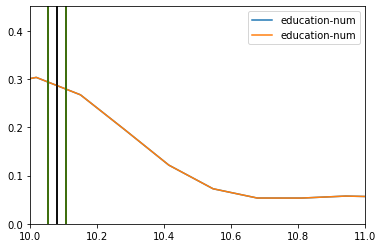

In [19]:
# plot on graph with kernel density 
plt.xlim(10, 11);

sns.kdeplot(adults['education-num']);
plt.axvline(x=conf_freq[0], color = 'red');
plt.axvline(x=conf_freq[1], color = 'red');
plt.axvline(x=np.mean(adults['education-num']), color = 'k');

sns.kdeplot(adults['education-num']);
plt.axvline(x=conf_bayes[0], color = 'green');
plt.axvline(x=conf_bayes[1], color = 'green');
plt.axvline(x=np.mean(adults['education-num']), color = 'k');

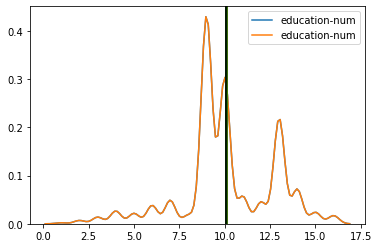

In [20]:
# plot on graph with kernel density estimate
sns.kdeplot(adults['education-num']);
plt.axvline(x=conf_freq[0], color = 'red');
plt.axvline(x=conf_freq[1], color = 'red');
plt.axvline(x=np.mean(adults['education-num']), color = 'k');

sns.kdeplot(adults['education-num']);
plt.axvline(x=conf_bayes[0], color = 'green');
plt.axvline(x=conf_bayes[1], color = 'green');
plt.axvline(x=np.mean(adults['education-num']), color = 'k');

###**Using stats.bayes_mvs to create a 3-D graph**

In [21]:
mean1, var1, std1 = stats.bayes_mvs(adults['education-num'], 0.95) 
print('mean', mean1)
print('var', var1)
print('std', std1)

mean Mean(statistic=10.0806793403151, minmax=(10.0527355615954, 10.108623119034801))
var Variance(statistic=6.6186866304165175, minmax=(6.517018218205304, 6.720355042627731))
std Std_dev(statistic=2.5726808256012865, minmax=(2.55292159017661, 2.5924400610259632))


In [22]:
mean1, var1, std1 = stats.bayes_mvs(adults['age'], 0.95) 
print('mean', mean1)
print('var', var1)
print('std', std1)

mean Mean(statistic=38.58164675532078, minmax=(38.433490259580736, 38.72980325106083))
var Variance(statistic=186.05568600783081, minmax=(183.19771927884943, 188.9136527368122))
std Std_dev(statistic=13.640223092304275, minmax=(13.535460629489652, 13.744985555118898))


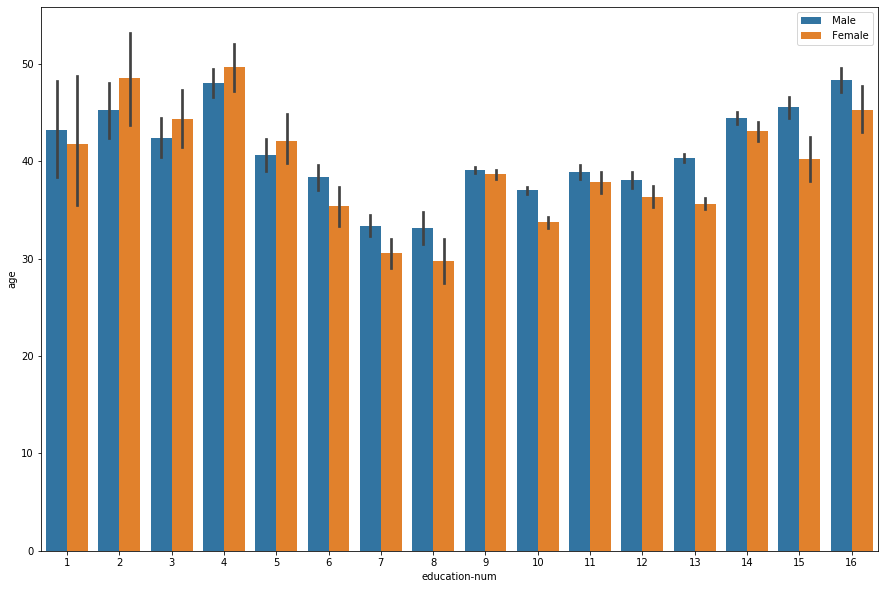

In [33]:
plt.figure(figsize=(15, 10))
sns.barplot(adults['education-num'], adults['age'], hue=adults['sex']);
plt.legend(loc = 'upper right');

#**3) In your own words, summarize the difference between Bayesian and Frequentist statistics**

In [0]:
#Bayes Function
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  prior_drunk = []
  for i in range (0, 20):
    prob_drunk_prior = (true_positive_rate * prob_drunk_prior)/((true_positive_rate * prob_drunk_prior) + (false_positive_rate)*(1-prob_drunk_prior))
    prior_drunk.append(prob_drunk_prior)      
  return prior_drunk

In [0]:
#Frequentist Approach
def frequentist (positive,false_positive):
  prior_drunk = []
  for i in range (0, 20):
    positive_drunk = positive - false_positive**(i)
    prior_drunk.append(positive_drunk)
  return prior_drunk

In [0]:
bayesian = prob_drunk_given_positive(.001, 0.08, 1)
frequentist = frequentist(1, .08)

In [37]:
bayesian

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054,
 0.9967371577896734,
 0.9997381867081508,
 0.9999790498904363,
 0.9999983239589307,
 0.9999998659165077,
 0.9999999892733192,
 0.9999999991418655,
 0.9999999999313492,
 0.999999999994508,
 0.9999999999995607,
 0.9999999999999648,
 0.9999999999999972,
 0.9999999999999998,
 1.0,
 1.0,
 1.0]

In [38]:
frequentist

[0.0,
 0.92,
 0.9936,
 0.999488,
 0.99995904,
 0.9999967232,
 0.999999737856,
 0.99999997902848,
 0.9999999983222784,
 0.9999999998657823,
 0.9999999999892626,
 0.999999999999141,
 0.9999999999999313,
 0.9999999999999944,
 0.9999999999999996,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

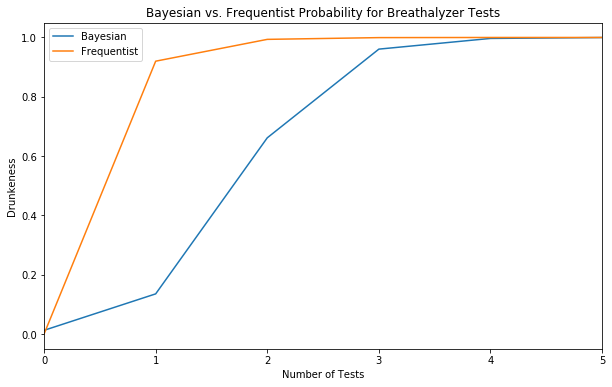

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(bayesian, label='Bayesian')
ax.plot(frequentist, label='Frequentist')
ax.set_ylabel('Drunkeness')
ax.set_xlabel('Number of Tests')
ax.set_title('Bayesian vs. Frequentist Probability for Breathalyzer Tests')
ax.set_xlim(0,5)
ax.legend()
plt.show()

The difference between **Bayesian and Frequentist** is what constitutes a probability. **Frequentists** believe only repeatable random events have probabilities. **Bayesian statisticians** update their posterior (prior beliefs) based on the likelihood of an event and prior probability. 


## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!